## Gaussian Distributions of the harmonic oscillator parameters

mu: 0 negative values.
k: 0 negative values.
mass: 0 negative values.
mu_adim: 0 negative values.


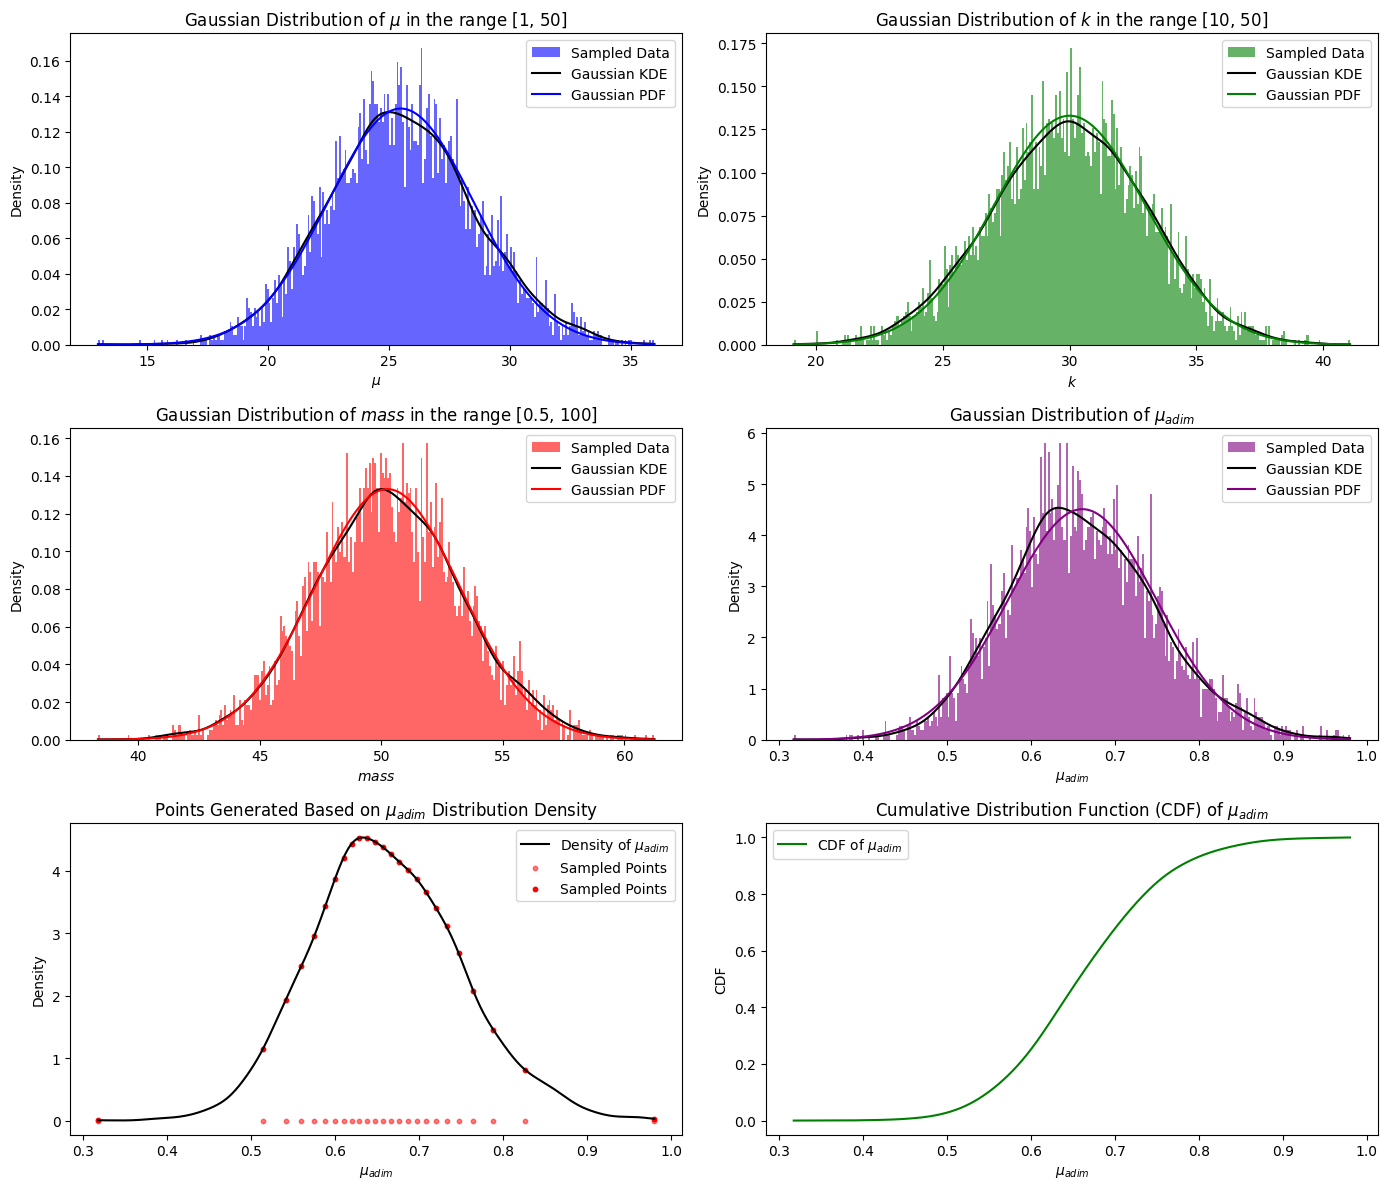

In [30]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, gaussian_kde

# mu_adim sampling due to outsiders:
def sample_truncated_normal(mean, std, min_val, max_val, num_points):
    samples = torch.normal(mean, std, (num_points,))
    while torch.any(samples < min_val) or torch.any(samples > max_val):
        mask = (samples < min_val) | (samples > max_val)
        mu_adimsamples = torch.normal(mean, std, (mask.sum(),))
        samples[mask] = mu_adimsamples
    return samples

# Parameter ranges
mu_range = [1,50]
k_range = [10 ,50]
mass_range = [0.5,100]

# Parameters for the normal distributions
mu_mean = np.mean(mu_range)
k_mean = np.mean(k_range)
mass_mean = np.mean(mass_range)

mu_std = 3
k_std = 3
mass_std = 3

#mu_mean, mu_std = 5.5, 1.5
#k_mean, k_std = 25, 1.5
#mass_mean, m_std = 55, 1.5

# Number of points to generate by the normal distribution
num_points = 5000

# Number of bins(plots):
num_bins = 300

# Generate points using TRUNCATED normal distribution
#mu = sample_truncated_normal(mu_mean, mu_std, mu_range[0], mu_range[-1], num_points)
#k = sample_truncated_normal(k_mean, k_std, k_range[0], k_range[-1], num_points)
#mass = sample_truncated_normal(m_mean, m_std, m_range[0], m_range[-1], num_points)

# Generate points for each parameter using normal distribution
mu = torch.normal(mu_mean, mu_std, (num_points,))
k = torch.normal(k_mean, k_std, (num_points,))
mass = torch.normal(mass_mean, mass_std, (num_points,))

# Compute mu_adim
mu_adim = mu / torch.sqrt(k * mass)
###############################################################################################
# Counting Negative values of the tensors mu, k, mass and mu_adim

def count_negative_values_in_tensors(**tensors):
    for tensor_name, tensor in tensors.items():
        negative_mask = tensor < 0
        num_negative_values = torch.sum(negative_mask)
        print(f"{tensor_name}: {num_negative_values.item()} negative values.")

# Call the function with a variable number of tensors
count_negative_values_in_tensors(mu=mu, k=k, mass=mass, mu_adim=mu_adim)

###############################################################################################
#KDE: Kernel Density Estimation
#PDF: Probability Density Function
###############################################################################################
# Generation of KDE and PDF functions for mu, k and mass 
kde_mu = gaussian_kde(mu)
x_mu = torch.linspace(mu.min(), mu.max(), num_points)
mu_pdf = norm.pdf(x_mu, mu_mean, mu_std)

kde_k = gaussian_kde(k)
x_k = torch.linspace(k.min(), k.max(), num_points)
k_pdf = norm.pdf(x_k, k_mean, k_std)

kde_mass = gaussian_kde(mass)
x_mass = torch.linspace(mass.min(), mass.max(), num_points)
mass_pdf = norm.pdf(x_mass, mass_mean, mass_std)

###############################################################################################
# Generation of KDE and PDF distributions of mu_adim and smaples for training
kde_mu_adim = gaussian_kde(mu_adim)
x_mu_adim = torch.linspace(mu_adim.min(), mu_adim.max(), num_points)
mu_adim_pdf = norm.pdf(x_mu_adim, torch.mean(mu_adim), torch.std(mu_adim))

# Generate a range of `mu_adim` values for plotting the density
kde_mu_adim_density = kde_mu_adim(x_mu_adim)
# Calculate the Cumulative Density Function (CDF), the cumulative sum of the density values
cdf_mu_adim = np.cumsum(kde_mu_adim_density)
# Normalize the CDF so that its values range from 0 to 1
cdf_mu_adim /= cdf_mu_adim[-1]
# Generate points based on the density using inverse transform sampling
num_points_mu_adim = 25  # Number of points to generate
# Generate uniform RANDOM samples in the range [0, 1]
#uniform_samples = np.random.rand(num_points)
# Generate EVENLY spaced samples in the range [0, 1]
uniform_samples = np.linspace(0, 1, num_points_mu_adim)
# Map the uniform samples to `mu_adim` values using the inverse of the CDF
mu_adim_sampled = np.interp(uniform_samples, cdf_mu_adim, x_mu_adim)

###############################################################################################
#PLOTTING:
# Set up the figure
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Gaussian distribution plot for mu
axs[0, 0].hist(mu, bins=num_bins, density=True, alpha=0.6, color='blue', label='Sampled Data')
axs[0, 0].plot(x_mu, kde_mu(x_mu), color='black', label='Gaussian KDE')
#axs[0, 0].fill_between(x_mu, kde_mu(x_mu), alpha=0.3, color='blue')
#x_mu = torch.linspace(mu.min(), mu.max(), num_points)
axs[0, 0].plot(x_mu, mu_pdf, color='blue', label='Gaussian PDF')
axs[0, 0].set_title(f'Gaussian Distribution of $\mu$ in the range {mu_range}')
axs[0, 0].set_xlabel('$\mu$')
axs[0, 0].set_ylabel('Density')
axs[0, 0].legend()

# Gaussian distribution plot for k
axs[0, 1].hist(k, bins=num_bins, density=True, alpha=0.6, color='green', label='Sampled Data')
axs[0, 1].plot(x_k, kde_k(x_k), color='black', label='Gaussian KDE')
axs[0, 1].plot(x_k, k_pdf, color='green', label='Gaussian PDF')
axs[0, 1].set_title(f'Gaussian Distribution of $k$ in the range {k_range}')
axs[0, 1].set_xlabel('$k$')
axs[0, 1].set_ylabel('Density')
axs[0, 1].legend()

# Gaussian distribution plot for mass
axs[1, 0].hist(mass, bins=num_bins, density=True, alpha=0.6, color='red', label='Sampled Data')
axs[1, 0].plot(x_mass, kde_mass(x_mass), color='black', label='Gaussian KDE')
axs[1, 0].plot(x_mass, mass_pdf, color='red', label='Gaussian PDF')
axs[1, 0].set_title(f'Gaussian Distribution of $mass$ in the range {mass_range}')
axs[1, 0].set_xlabel('$mass$')
axs[1, 0].set_ylabel('Density')
axs[1, 0].legend()

# Gaussian distribution plot for mu_adim
axs[1, 1].hist(mu_adim, bins=num_bins, density=True, alpha=0.6, color='purple', label='Sampled Data')
#x_mu_adim = torch.linspace(mu_adim.min(), mu_adim.max(), num_points)
#kde_mu_adim = gaussian_kde(mu_adim)
axs[1, 1].plot(x_mu_adim, kde_mu_adim_density, color='black', label='Gaussian KDE')
#mu_adim_pdf = norm.pdf(x_mu_adim, torch.mean(x_mu_adim), torch.std(x_mu_adim))
axs[1, 1].plot(x_mu_adim, mu_adim_pdf, color='purple', label='Gaussian PDF')
axs[1, 1].set_title('Gaussian Distribution of $\mu_{adim}$')
axs[1, 1].set_xlabel('$\mu_{adim}$')
axs[1, 1].set_ylabel('Density')
axs[1, 1].legend()

# Plot the KDE of the mu_adim distribution
axs[2,0].plot(x_mu_adim, kde_mu_adim_density, label='Density of $\mu_{adim}$', color='black')
# Plot the sampled points along the `mu_adim` axis
axs[2,0].scatter(mu_adim_sampled, np.zeros_like(mu_adim_sampled), color='red', s=10, label='Sampled Points', alpha=0.5)
axs[2,0].scatter(mu_adim_sampled, kde_mu_adim(mu_adim_sampled), color='red', s=10, label='Sampled Points')

# Plot settings for the density plot
axs[2,0].set_xlabel('$\mu_{adim}$')
axs[2,0].set_ylabel('Density')
axs[2,0].set_title('Points Generated Based on $\mu_{adim}$ Distribution Density')
axs[2,0].legend()

# Plot the CDF of mu_adim
axs[2,1].plot(x_mu_adim, cdf_mu_adim, label='CDF of $\mu_{adim}$', color='green')
#ecdf = np.arange(1, len(cdf_mu_adim)+1) / len(cdf_mu_adim)
#axs[2, 1].step(ecdf,cdf_mu_adim, label='CDF of $\mu_{adim}$', color='purple')
#ecdf = np.arange(1, len(cdf_mu_adim)+1) / len(cdf_mu_adim)
#axs[2, 1].step(x_mu_adim, cdf_mu_adim, label='CDF of $\mu_{adim}$', color='purple')
# Plot settings for the CDF plot
axs[2,1].set_xlabel('$\mu_{adim}$')
axs[2,1].set_ylabel('CDF')
axs[2,1].set_title('Cumulative Distribution Function (CDF) of $\mu_{adim}$')
axs[2,1].legend()

plt.tight_layout()
plt.show()




In [29]:
torch.any(mu_adim < 0)

tensor(True)